# Time Series Forecasting 
### Forecasting Energy Consumption using ML algorithms

In [65]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import xgboost as xgb
from sklearn.metrics import mean_squared_error

"""
Sets up the visual style and color palette for plots using Matplotlib and Seaborn.

This script performs the following steps:
1. Retrieves the default Seaborn color palette and stores it in the variable `color_pal`.
2. Applies the 'fivethirtyeight' style to Matplotlib plots, which changes the overall aesthetic
   to match the distinctive and clean style used by the website FiveThirtyEight.
"""

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [66]:
#Read the CSV file into a DataFrame
df= pd.read_csv('PJME_hourly.csv')

In [67]:
# Set the 'Datetime' column as the index of the DataFrame
df= df.set_index('Datetime')

In [68]:
## Convert the index to a datetime format
df.index = pd.to_datetime(df.index)
"""
This line converts the DataFrame's index to a datetime format 
using Pandas' pd.to_datetime() function.

By converting the index to a datetime object, it ensures that 
the index is properly recognized as datetime data,
which allows for time-based indexing and operations,
such as resampling, rolling windows, 
and plotting time series data.

"""

"\nThis line converts the DataFrame's index to a datetime format \nusing Pandas' pd.to_datetime() function.\n\nBy converting the index to a datetime object, it ensures that \nthe index is properly recognized as datetime data,\nwhich allows for time-based indexing and operations,\nsuch as resampling, rolling windows, \nand plotting time series data.\n\n"

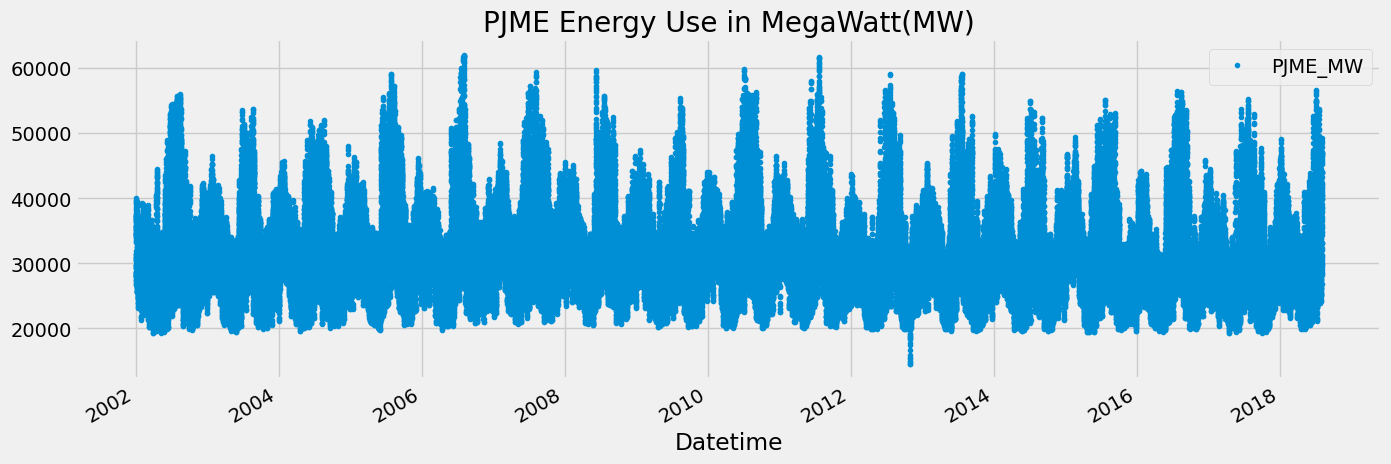

In [69]:
df.plot(style='.',
        figsize=(15, 5),
        title='PJME Energy Use in MegaWatt(MW)'
        )
plt.show()

# Train/Test Split

In [70]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015'] 

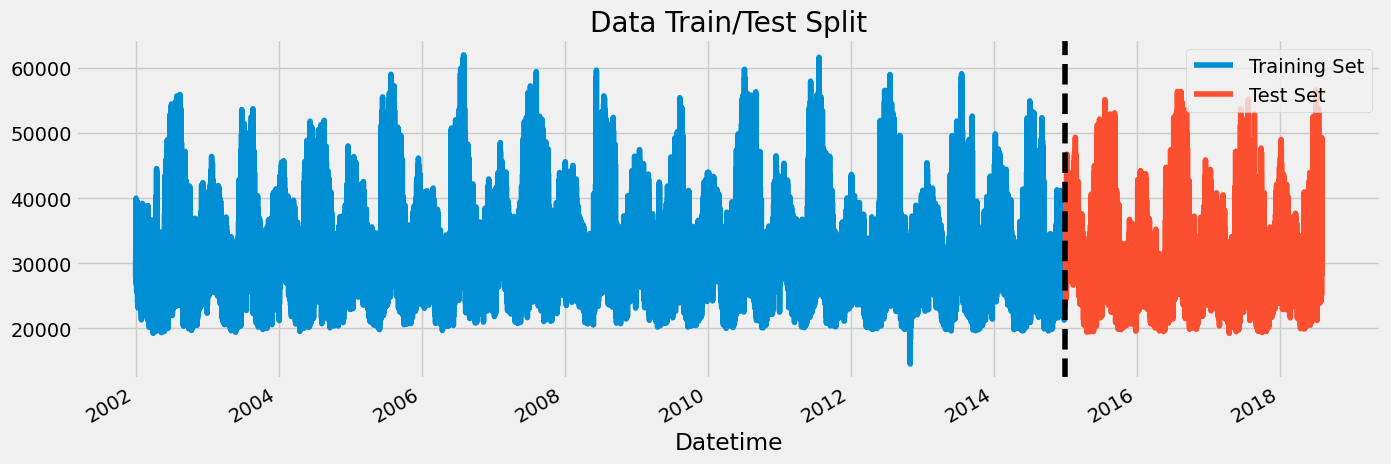

In [71]:
# Create a figure and axes with a specified size
fig, ax = plt.subplots(figsize=(15, 5))

# PLot the training set on the axes
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')

# Plot the test set on the same axes
test.plot(ax=ax, label='Test Set')

#Add a vertical line to indicate the split point
ax.axvline('01-01-2015', color='black', ls='--')

#Add a legend to identify the traning and test sets
ax.legend(['Training Set', 'Test Set'])

plt.show()

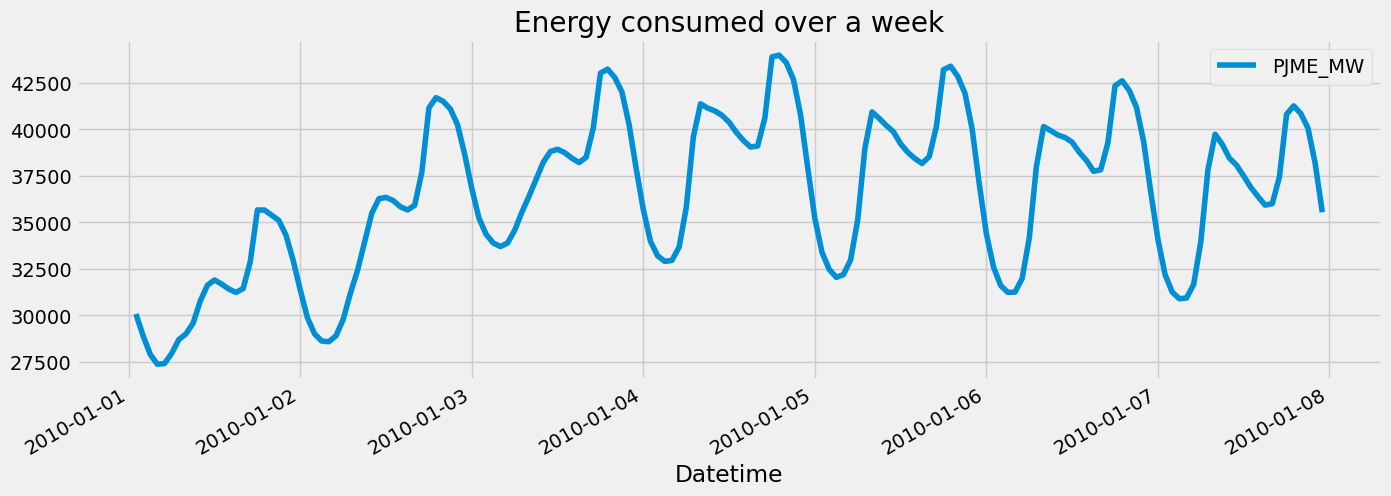

In [72]:
# Filter the DataFrame for data between January 1, 2010, and August 1, 2010, and plot it
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Energy consumed over a week')
plt.show()

# Feature Creation

In [73]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df= df.copy()
    print("Existing columns:", df.columns)
    df['hour']= df.index.hour
    df['dayofweek']= df.index.dayofweek
    df['quarter']= df.index.quarter
    print("Columns after adding 'quarter':", df.columns)
    df['month']=df.index.month
    df['year']= df.index.year
    df['dayofyear']= df.index.dayofyear
    df['dayofmonth']= df.index.day
    df['weekofyear']= df.index.isocalendar().week
    return df

df = create_features(df)
print("Final columns:", df.columns)

Existing columns: Index(['PJME_MW'], dtype='object')
Columns after adding 'quarter': Index(['PJME_MW', 'hour', 'dayofweek', 'quarter'], dtype='object')
Final columns: Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')


# Visualize our Feature and Target Relationship
##### Bi-variate Analysis

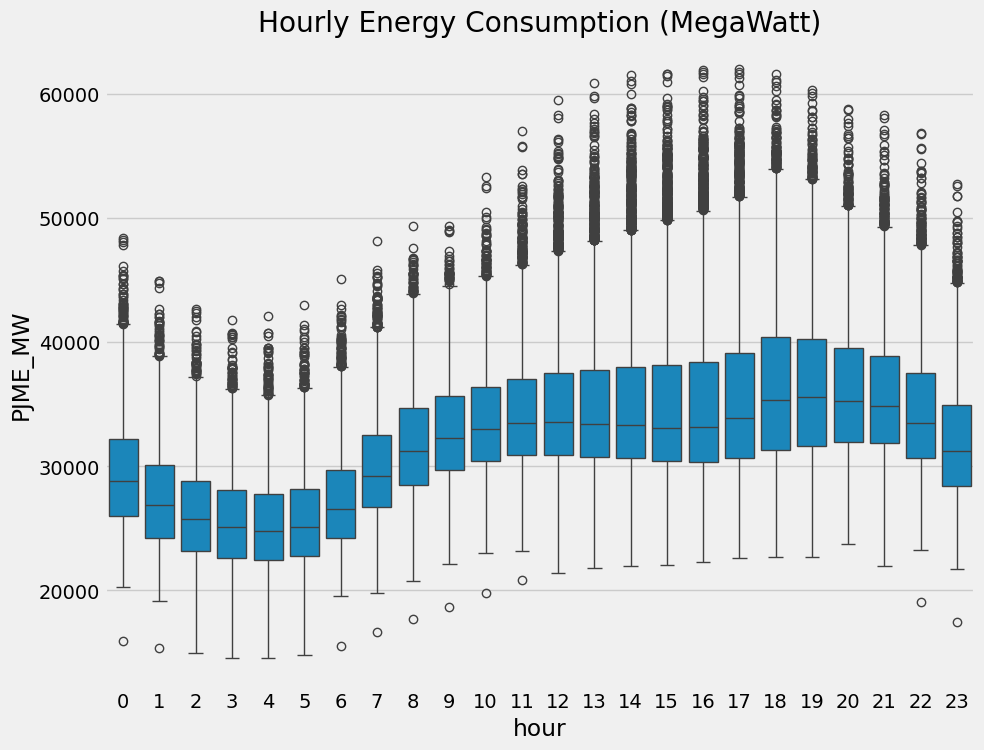

In [74]:
'''
This single plot visualizes the variation in 
energy consumption across different hours of the day.
'''
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('Hourly Energy Consumption (MegaWatt)')
plt.show()


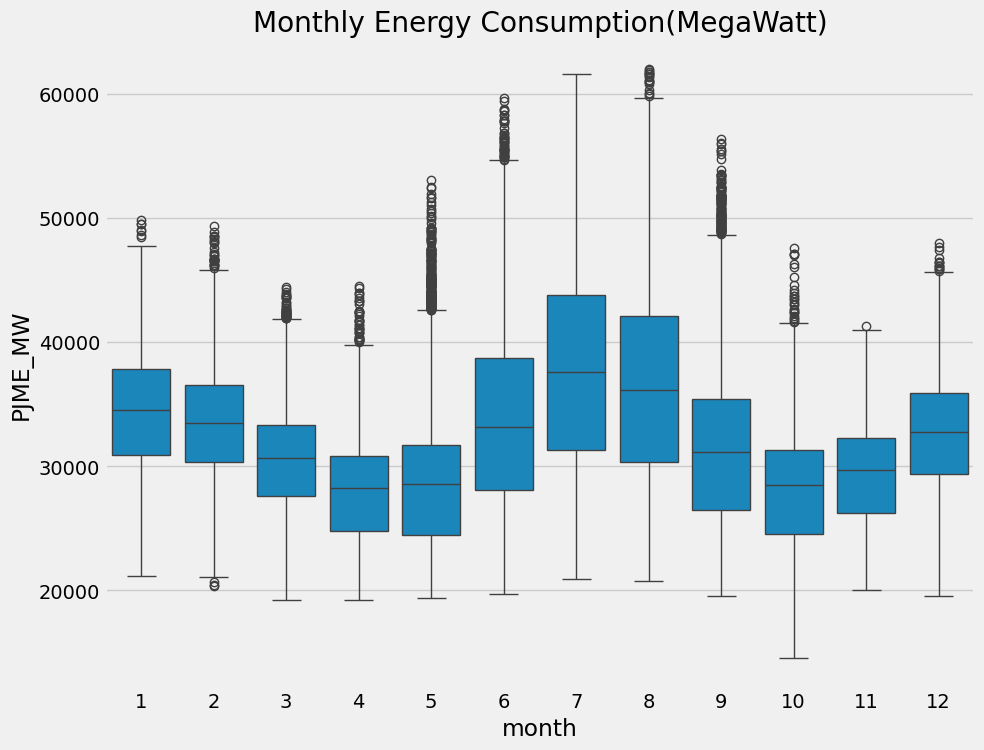

In [75]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('Monthly Energy Consumption(MegaWatt)')
plt.show()

# Create our Model

In [78]:
train= create_features(train)
test= create_features(test) 

FEATURES= ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET= ['PJME_MW']

X_train= train[FEATURES]
y_train= train[TARGET]

X_test= test[FEATURES]
y_test= test[TARGET]

Existing columns: Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')
Columns after adding 'quarter': Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')
Existing columns: Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')
Columns after adding 'quarter': Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')


In [79]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

'''The XGBoost regressor is configured to use gradient boosting trees for regression (booster='gbtree').
It aims to fit 1000 trees (n_estimators=1000), with each tree having a maximum depth of 3 (max_depth=3).
The learning rate is set to 0.01 (learning_rate=0.01), which controls the step size during gradient descent.
Early stopping is enabled with early_stopping_rounds=50, meaning that if the performance on the validation set (evaluated every 100 rounds) does not improve for 50 consecutive rounds, the training will stop.
'''

[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


C:\Users\Muskan Shrestha\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [21:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[989]	validation_0-rmse:3059.85847	validation_1-rmse:3727.94591


"The XGBoost regressor is configured to use gradient boosting trees for regression (booster='gbtree').\nIt aims to fit 1000 trees (n_estimators=1000), with each tree having a maximum depth of 3 (max_depth=3).\nThe learning rate is set to 0.01 (learning_rate=0.01), which controls the step size during gradient descent.\nEarly stopping is enabled with early_stopping_rounds=50, meaning that if the performance on the validation set (evaluated every 100 rounds) does not improve for 50 consecutive rounds, the training will stop.\n"

# Feature Importance